In [8]:
import pandas as pd
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [9]:
#load the dataset
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
#takes columns 2 to 4 excluding CustomerID and Gender
features=df.iloc[:,2:5]
features

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


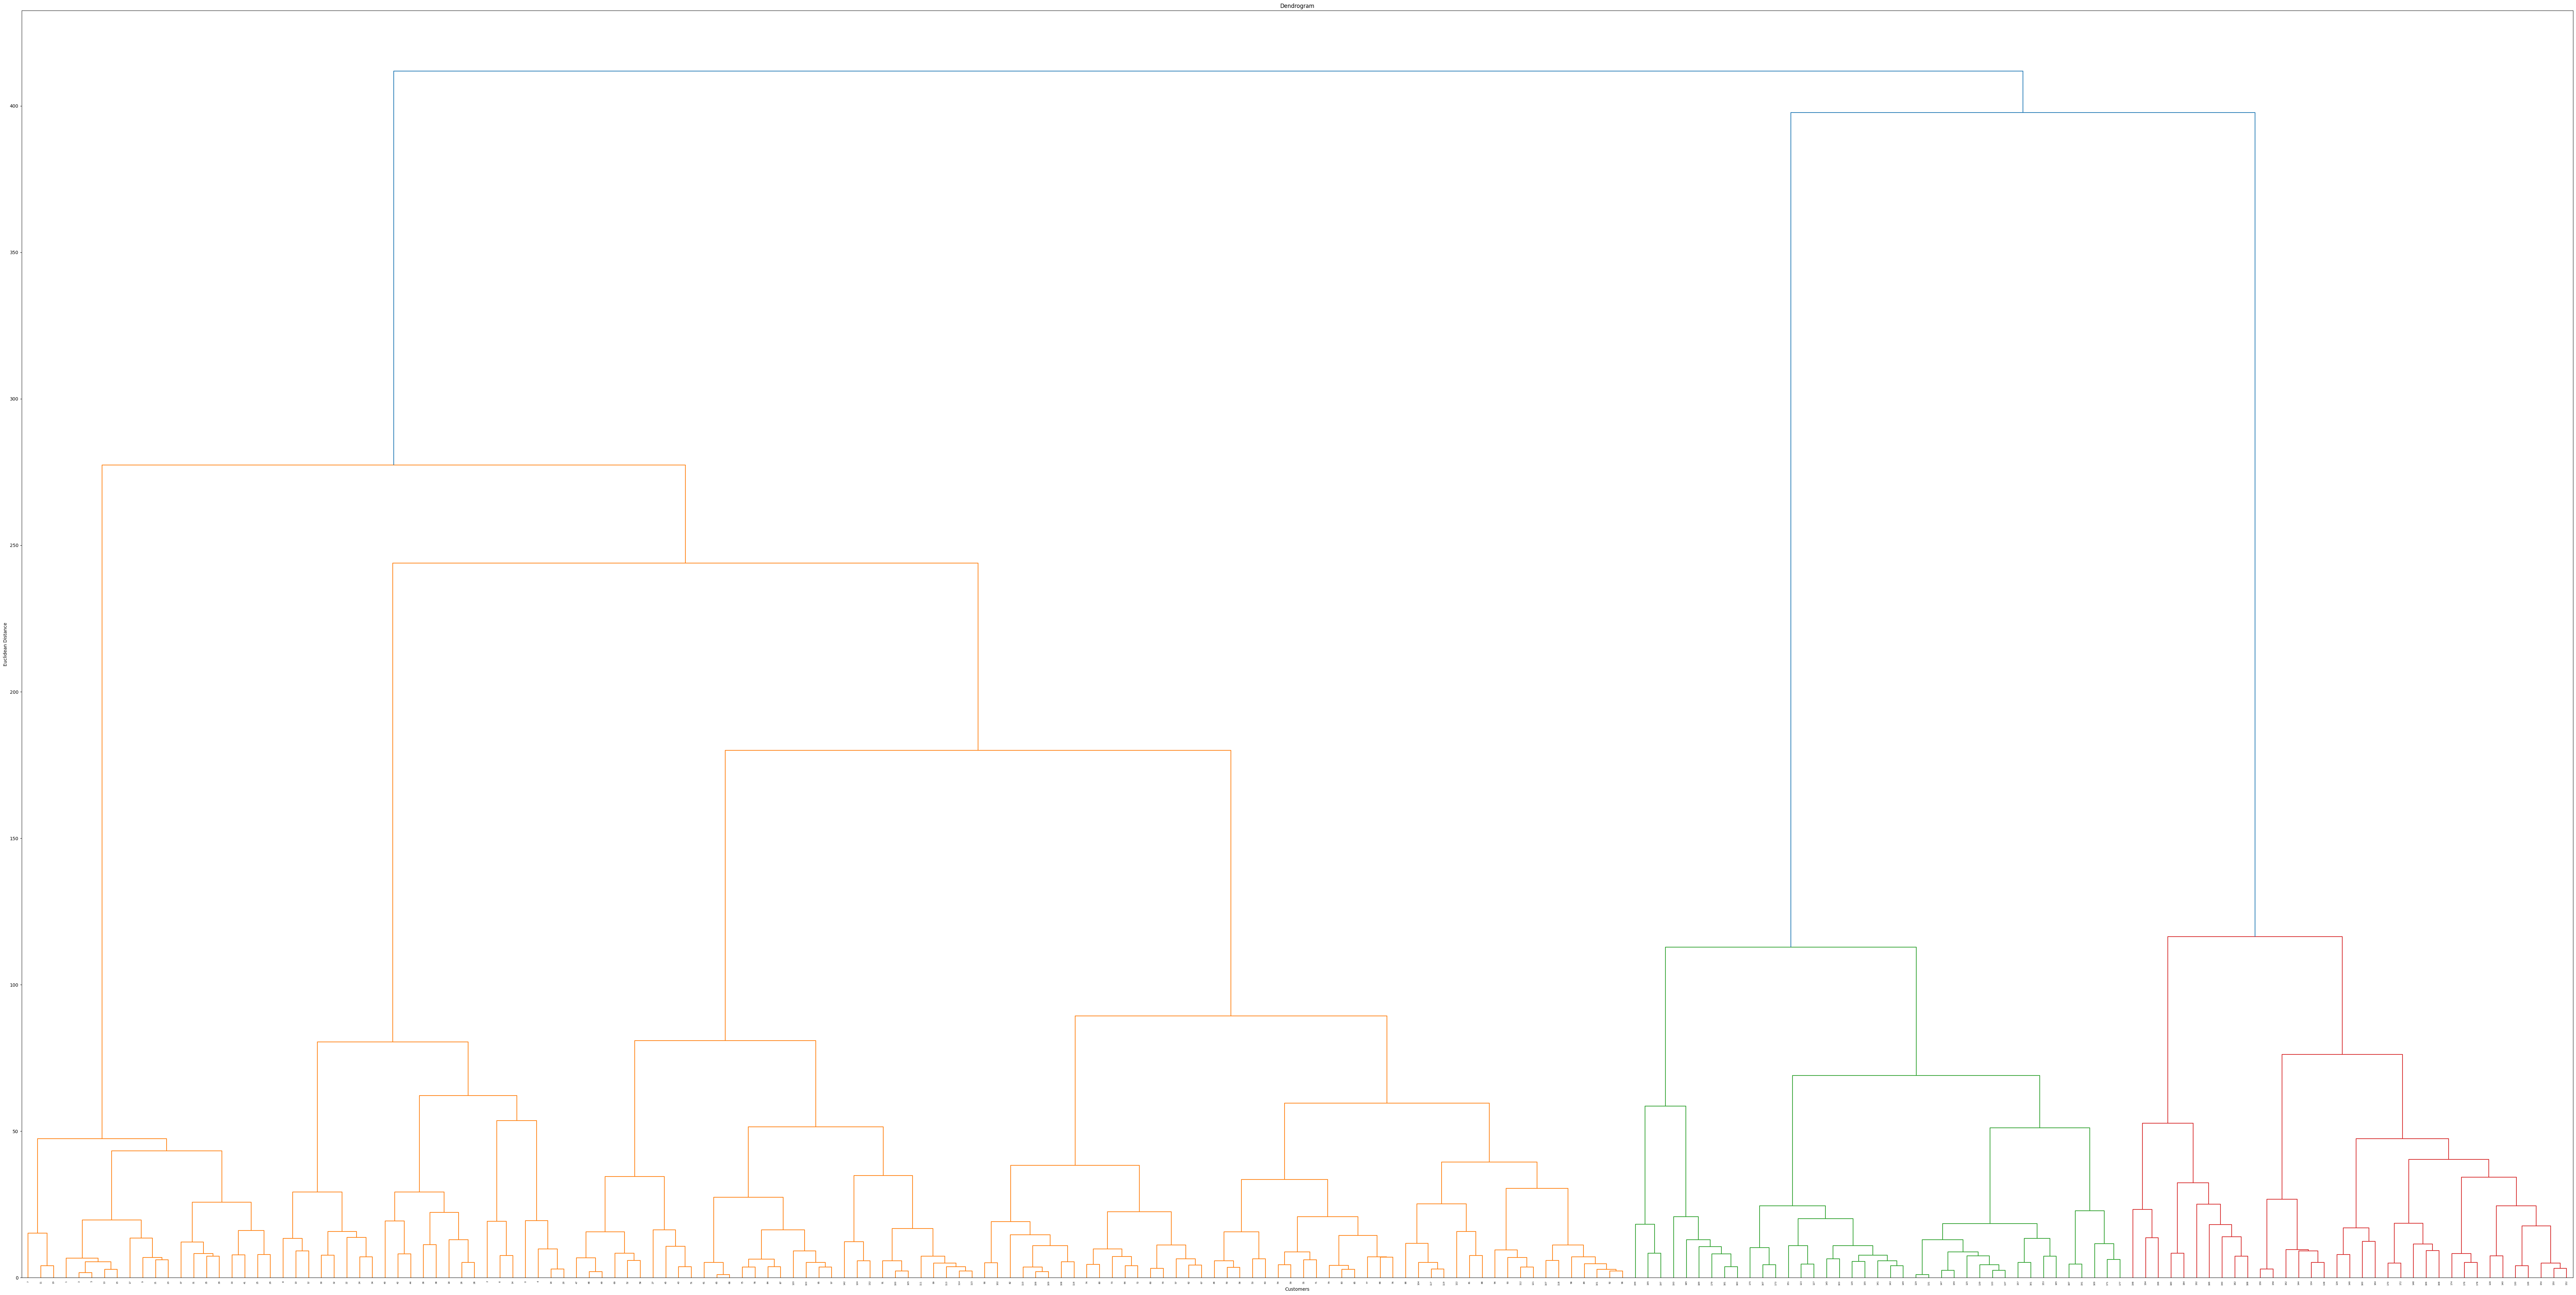

In [11]:
#Drawing thehierarchical Clustering figure
plt.figure(figsize=(100,50))
dendrogram = sch.dendrogram(sch.linkage(features, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

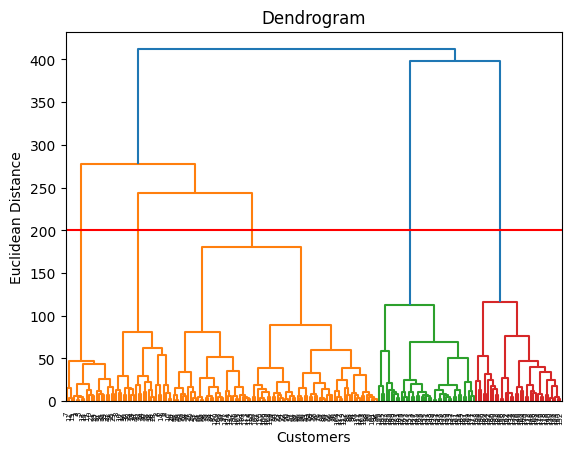

In [12]:
dendrogram = sch.dendrogram(sch.linkage(features, method='ward'))
plt.axhline(y=200, color='r')
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

In [25]:
#Using Agglomerative Cluster with 5 clusters
cluster = AgglomerativeClustering(n_clusters=5, linkage='ward')
labels= cluster.fit_predict(features)

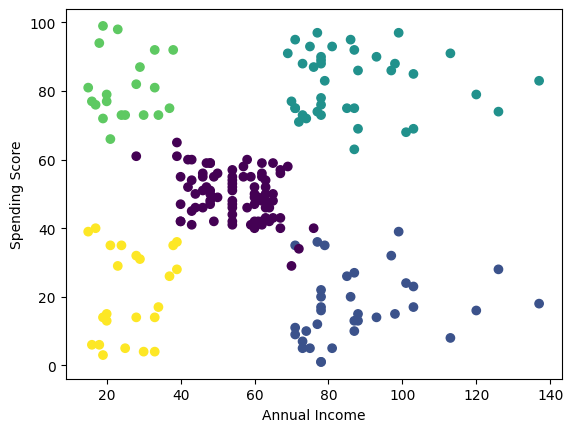

In [14]:
plt.scatter(features['Annual Income (k$)'], features['Spending Score (1-100)'], c=cluster.labels_)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [26]:
#Creates a new column called Cluster with the Predicted Clusters of the Features
df['Cluster'] = labels


In [27]:
#create Cluster profile based on the mean of Age, Annual Income and Spending Score of each cluster while dropping the ID column
cluster_profile = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
cluster_profile = df.drop(columns=['CustomerID']).groupby('Cluster').mean(numeric_only=True)

print(cluster_profile)

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        42.156627           54.759036               49.771084
1        41.685714           88.228571               17.285714
2        32.692308           86.538462               82.128205
3        24.850000           24.950000               81.000000
4        45.217391           26.304348               20.913043


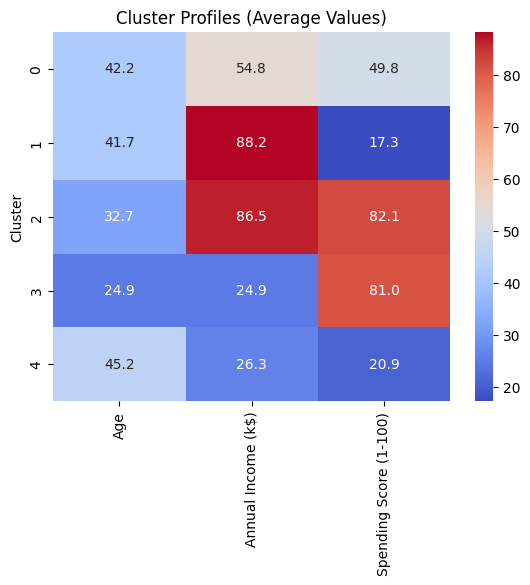

In [28]:
#Created a Heatmap in order to visualize the cluster profile
sns.heatmap(cluster_profile, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Cluster Profiles (Average Values)")
plt.show()

In [22]:
#Standardizing the Age, Annual Income and Spedning Score
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_profile[['Age','Annual Income (k$)', 'Spending Score (1-100)']])
scaled_df = pd.DataFrame(scaled_features, columns=['Scaled_Age','Scaled_Income', 'Scaled_Spending'], index=cluster_profile.index)

In [29]:
#Calculating The Combind Score of the Cluster Profile
cluster_profile['Combined_Score'] = scaled_df['Scaled_Age']+scaled_df['Scaled_Income'] + scaled_df['Scaled_Spending']


In [30]:
target_column = 'Spending Score (1-100)'
best_cluster = cluster_profile[target_column].idxmax()
print(f'The Best Customer Cluster with the highest Spending Score: Cluster Number {best_cluster}')
target_column = 'Annual Income (k$)'
best_cluster = cluster_profile[target_column].idxmax()
print(f'The Best Customer Cluster with the highest Annual Income: Cluster Number {best_cluster}')
target_column = 'Age'
best_cluster = cluster_profile[target_column].idxmin()
print(f'The Best Customer Cluster with the Youngest Age: Cluster Number {best_cluster}')
#ranking clusters from highest to lowest combined score
ranked_clusters = cluster_profile.sort_values(by='Combined_Score', ascending=False)
best_cluster = ranked_clusters.index[0]
print(f'The Final Best Customer Cluster: Cluster Number {best_cluster}')

The Best Customer Cluster with the highest Spending Score: Cluster Number 2
The Best Customer Cluster with the highest Annual Income: Cluster Number 1
The Best Customer Cluster with the Youngest Age: Cluster Number 3
The Final Best Customer Cluster: Cluster Number 2
